In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('iris.csv')
df.head(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
df.index

RangeIndex(start=0, stop=150, step=1)

In [4]:
columns_eda = df.columns[:-1]
columns_eda

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'], dtype='object')

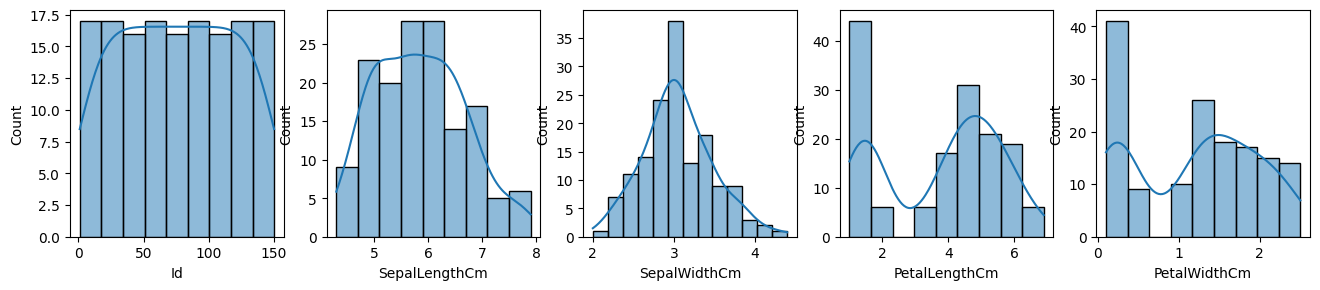

In [5]:
fig = plt.figure(figsize=(16,10))

for i in range(len(columns_eda)):
    colname = columns_eda[i]
    sub = fig.add_subplot(3,5,i+1)
    sns.histplot(data=df, x=colname, kde=True)

In [34]:
X = df.iloc[:,:-1].values
y = df[['Species']].values

print(f'{y}')

[['Iris-setosa']
 ['Iris-setosa']
 ['Iris-setosa']
 ['Iris-setosa']
 ['Iris-setosa']
 ['Iris-setosa']
 ['Iris-setosa']
 ['Iris-setosa']
 ['Iris-setosa']
 ['Iris-setosa']
 ['Iris-setosa']
 ['Iris-setosa']
 ['Iris-setosa']
 ['Iris-setosa']
 ['Iris-setosa']
 ['Iris-setosa']
 ['Iris-setosa']
 ['Iris-setosa']
 ['Iris-setosa']
 ['Iris-setosa']
 ['Iris-setosa']
 ['Iris-setosa']
 ['Iris-setosa']
 ['Iris-setosa']
 ['Iris-setosa']
 ['Iris-setosa']
 ['Iris-setosa']
 ['Iris-setosa']
 ['Iris-setosa']
 ['Iris-setosa']
 ['Iris-setosa']
 ['Iris-setosa']
 ['Iris-setosa']
 ['Iris-setosa']
 ['Iris-setosa']
 ['Iris-setosa']
 ['Iris-setosa']
 ['Iris-setosa']
 ['Iris-setosa']
 ['Iris-setosa']
 ['Iris-setosa']
 ['Iris-setosa']
 ['Iris-setosa']
 ['Iris-setosa']
 ['Iris-setosa']
 ['Iris-setosa']
 ['Iris-setosa']
 ['Iris-setosa']
 ['Iris-setosa']
 ['Iris-setosa']
 ['Iris-versicolor']
 ['Iris-versicolor']
 ['Iris-versicolor']
 ['Iris-versicolor']
 ['Iris-versicolor']
 ['Iris-versicolor']
 ['Iris-versicolor']
 ['

In [41]:
from sklearn.preprocessing import LabelEncoder
import numpy as np

le = LabelEncoder()
y = le.fit_transform(y.ravel())

y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int64)

In [43]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test, X_index_train, X_index_test = train_test_split(X, y, df.index, test_size=0.2, random_state=42)

print(f'X train index: {X_index_train}', end="\n")
print(f'X test index: {X_index_test}', end="\n")

X train index: Index([ 22,  15,  65,  11,  42, 146,  51,  27,   4,  32,
       ...
        87,  74, 121, 149,  20,  71, 106,  14,  92, 102],
      dtype='int64', length=120)
X test index: Index([ 73,  18, 118,  78,  76,  31,  64, 141,  68,  82, 110,  12,  36,   9,
        19,  56, 104,  69,  55, 132,  29, 127,  26, 128, 131, 145, 108, 143,
        45,  30],
      dtype='int64')


In [44]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=8, algorithm="ball_tree")

knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='ball_tree', n_neighbors=8)

In [45]:
knn.score(X_test, y_test)

1.0

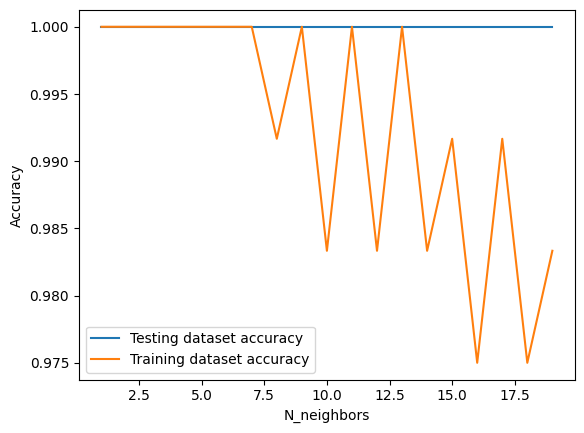

In [46]:
import numpy as np

neighbors = np.arange(1, 20)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)

    train_accuracy[i] = knn.score(X_train, y_train)
    test_accuracy[i] = knn.score(X_test, y_test)


plt.plot(neighbors, test_accuracy, label="Testing dataset accuracy")
plt.plot(neighbors, train_accuracy, label="Training dataset accuracy")

plt.legend()
plt.xlabel('N_neighbors')
plt.ylabel('Accuracy')
plt.show()

In [78]:
knn = KNeighborsClassifier(n_neighbors=16)

knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=16)

In [79]:
distance, indices = knn.kneighbors(X_test)

In [92]:
first_sample_input = X_test[0]

def euclidean_distance(point1, point2):
    return np.sqrt(np.sum((point1 - point2)**2))

distances = []
for i, train_point in enumerate(X_train):
    distance = euclidean_distance(first_sample_input, train_point)
    distances.append((i, distance))

distances = sorted(distances, key=lambda x: x[1])

distances = distances[:16]
for item in distances:
    print(f"index: {item[0]}\tDistance: {item[1]}")

index: 73	Distance: 1.1224972160321824
index: 111	Distance: 1.1269427669584648
index: 18	Distance: 2.1023796041628637
index: 115	Distance: 2.1213203435596424
index: 59	Distance: 3.0935416596516037
index: 54	Distance: 4.091454509095756
index: 25	Distance: 6.041522986797286
index: 88	Distance: 6.138403701289122
index: 22	Distance: 7.02993598832877
index: 53	Distance: 7.095068710026704
index: 2	Distance: 8.036168241145777
index: 15	Distance: 8.096912991998865
index: 79	Distance: 10.002499687578101
index: 62	Distance: 10.016985574512923
index: 45	Distance: 11.029959202100432
index: 44	Distance: 11.040833301884419


In [71]:
from sklearn.metrics import accuracy_score

y_test_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_test_pred)

print(f'accuracy: {accuracy}')

accuracy: 1.0
